In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

df=pd.read_csv(r"C:\Users\mahita samant\Downloads\Iris.csv")

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
X= df.drop('Species',axis=1)
y = df['Species']
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


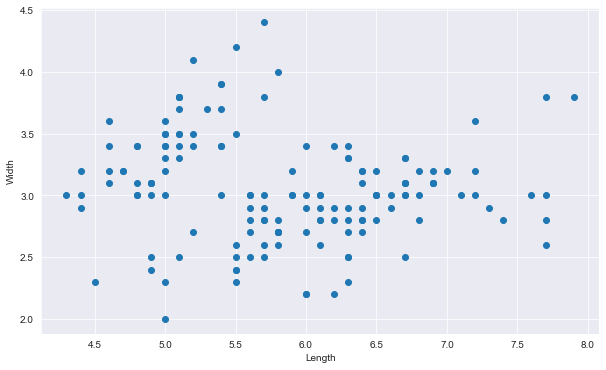

In [13]:

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(data=X,x='SepalLengthCm',y='SepalWidthCm')
plt.xlabel('Length')
plt.ylabel('Width');

c:\users\mahita samant\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


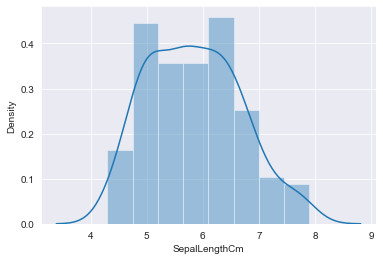

In [14]:
sns.distplot(df['SepalLengthCm']);

In [16]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled[:10]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.62816394, -1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-1.60506942, -0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.58197489, -1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.55888037, -1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.53578584, -1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.51269132, -1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [33]:

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

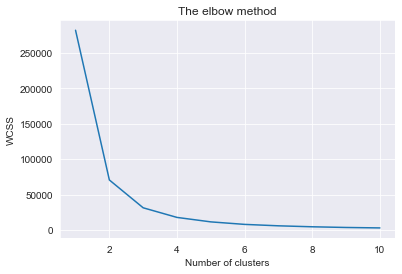

In [34]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

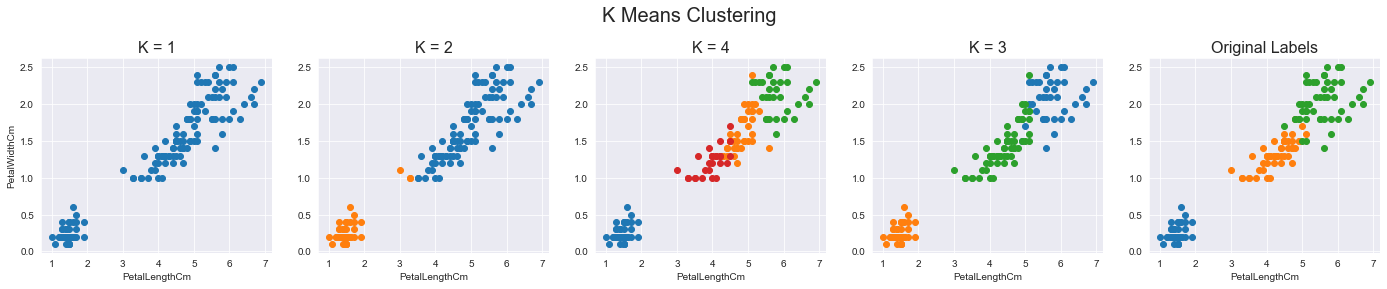

In [30]:
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# dropping labels we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# dropping labels as we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# dropping labels as we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()


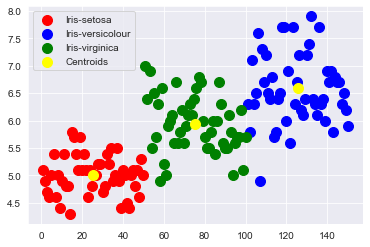

In [31]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()